The purpose of this notebook is to look at the genres available in the decades and the genres datasets.  If the distribution is normal(-ish) in a particular dataset than it is a good candidate for the project.  All other things being equal, I would prefer to use the genres dataset as it is bigger and the lyrics have not yet been cleaned.  I am concerned that the already-cleaned lyrics in decades will not give me enough information to prove the hypothesis, that we can predict a genre given a set of lyrics.

In [1]:
import pandas as pd
import numpy as np
import s3fs
import os
import io
import boto3

import s3fs
fs = s3fs.S3FileSystem(anon=False,key='###',secret='###')

In [2]:
from dotenv import load_dotenv
load_dotenv(verbose=True)

def aws_session(region_name='us-east-1'):
    return boto3.session.Session(aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'), #looks for any .env file
                                aws_secret_access_key=os.getenv('AWS_ACCESS_KEY_SECRET'), #Has to be in same directory
                                region_name=region_name) #from above

def make_bucket(name, acl): 
    session = aws_session()
    s3_resource = session.resource('s3')
    return s3_resource.create_bucket(Bucket=name, ACL=acl)

def upload_file_to_bucket(bucket_name, file_path):
    session = aws_session()
    s3_resource = session.resource('s3')
    file_dir, file_name = os.path.split(file_path)

    bucket = s3_resource.Bucket(bucket_name)
    bucket.upload_file(
      Filename=file_path,
      Key=file_name,
      ExtraArgs={'ACL': 'public-read'}
    )

    s3_url = f"https://{bucket_name}.s3.amazonaws.com/{file_name}"
    return s3_url

def download_file_from_bucket(bucket_name, s3_key, dst_path):
    session = aws_session()
    s3_resource = session.resource('s3')
    bucket = s3_resource.Bucket(bucket_name)
    bucket.download_file(Key=s3_key, Filename=dst_path)

In [3]:
!aws s3 ls 'wrangled-1'

2021-04-17 12:39:34   36238559 Main2_25k.csv
2021-04-17 13:07:17  144547686 big2_df.csv
2021-04-17 12:42:21  187833123 big_no_genre_df.csv
2021-05-04 07:21:58   14278350 decades4_df.csv
2021-04-17 12:40:50   14278350 decades_df.csv
2021-04-17 12:43:37  144584439 merged3_genre_df.csv
2021-05-04 07:03:59  195669510 merged4_genre_df.csv
2021-05-04 20:20:58  130153211 merged5_genre_df.csv


In [4]:
decades_df = pd.read_csv('s3://wrangled-1/decades4_df.csv')

In [5]:
decades_df.keys()

Index(['original_csv', 'artist_name', 'song_name', 'link', 'lyrics',
       'language', 'genre', 'date'],
      dtype='object')

In [6]:
decades_df.groupby(['genre']).count()

,original_csv,artist_name,song_name,link,lyrics,language,date
genre,,,,,,,
blues,4604,4604,4604,0,4604,0,4604
country,5445,5445,5445,0,5445,0,5445
hip hop,904,904,904,0,904,0,904
jazz,3845,3845,3845,0,3845,0,3845
pop,7042,7042,7042,0,7042,0,7042
reggae,2498,2498,2498,0,2498,0,2498
rock,4034,4034,4034,0,4034,0,4034


In [7]:
genres_df = pd.read_csv('s3://wrangled-1/merged4_genre_df.csv')
%timeit

In [8]:
genres_df.keys()

Index(['original_csv', 'artist_name', 'song_name', 'link', 'lyrics',
       'language', 'genre', 'date'],
      dtype='object')

In [9]:
genres_df.groupby(['genre']).count()

,original_csv,artist_name,song_name,link,lyrics,language,date
genre,,,,,,,
Funk Carioca,104,104,104,104,104,104,0
Hip Hop,23108,23108,23108,23108,23108,23108,0
Pop,40294,40294,40294,40294,40294,40294,0
Rock,60585,60585,60585,60585,60585,60585,0
Samba,52,52,52,52,52,52,0
Sertanejo,87,87,87,87,87,87,0


In [10]:
import matplotlib.pyplot as plt

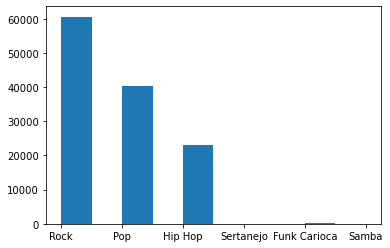

In [11]:
plt.hist(pd.DataFrame((genres_df),columns=['genre']))
plt.show()

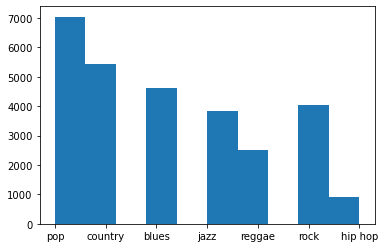

In [12]:
plt.hist(pd.DataFrame((decades_df),columns=['genre']))
plt.show()

In [13]:
decades_df.iloc[5942]['lyrics']#decades Taylor Swift The Story of Us

'think tell story spark fly instantly people ones know place spot search room seat cause lately know simple complication lead fallout things wish know wall break stand crowd room speak die know kill like kill yeah know twist fate break story look like tragedy chapter nervously pull clothe try look busy best avoid start think tell story lose mind hold pride like hold scar end pretend tell miss know hear silence loud stand crowd room speak die know kill like kill yeah know twist fate break story look like tragedy look like contest like care like better battle hand armor fight things wish know story end soon stand crowd room speak die know kill like kill yeah know twist fate break story look like tragedy speak die know kill like kill yeah know twist fate cause go story look like tragedy'

In [14]:
genres_df.loc[genres_df['song_name']=='The Story Of Us']

,original_csv,artist_name,song_name,link,lyrics,language,genre,date
121230,genres_csv,taylor-swift,The Story Of Us,/taylor-swift/the-story-of-us.html,I used to think one day we'd tell the story of...,ENGLISH,Pop,NaN


In [15]:
genres_df.iloc[121230]['lyrics']#genres Taylor Swift The Story of Us

"I used to think one day we'd tell the story of us. How we met and sparks flew instantly. People would say 'They're the lucky ones'. I used to know my place was a spot next to you. Now I'm searching the room for an empty seat. 'Cause lately I don't even know what page you're on. Oh. A simple complication, miscommunication. Has lead to fallout. Too many things that I wish you knew. So many walls up I can't break through. Now I'm standing alone in a crowded room. And we're not speaking. And I'm dying to know. Is it killing you like it's killing me?. And I don't know what to say. Since the twist of fate. When it all broke down. And the story of us looks a lot like a tragedy now. Next chapter. How'd we end up this way?. Se me nervously pulling at my clothes. And trying to look busy. And you're doing your best to avoid me. I'm starting to think one day I'll tell the story of us. How I was losing my mind when I saw you here. But you held your pride like you should've held me. Oh. I'm scared 

In [16]:
genres_df[genres_df.duplicated(subset=['lyrics'])]

,original_csv,artist_name,song_name,link,lyrics,language,genre,date
1,genres_csv,10000-maniacs,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,Pop,NaN
3,genres_csv,10000-maniacs,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,Pop,NaN
5,genres_csv,10000-maniacs,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,Pop,NaN
7,genres_csv,10000-maniacs,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH,Pop,NaN
9,genres_csv,10000-maniacs,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH,Pop,NaN
...,...,...,...,...,...,...,...,...
124221,genres_csv,sambo,"Sunday, Bloody Sunday",/sambo/sunday-bloody-sunday.html,I can't believe the news today. I can't close ...,ENGLISH,Rock,NaN
124222,genres_csv,sambo,This Love,/sambo/this-love.html,I was so high I did not recognize. The fire bu...,ENGLISH,Samba,NaN
124223,genres_csv,sambo,This Love,/sambo/this-love.html,I was so high I did not recognize. The fire bu...,ENGLISH,Rock,NaN
124225,genres_csv,sambo,Valerie,/sambo/valerie.html,Well sometimes I go out by myself. And I look ...,ENGLISH,Rock,NaN


In [17]:
decades_df[decades_df.duplicated(subset=['lyrics'])]

,original_csv,artist_name,song_name,link,lyrics,language,genre,date


In [18]:
genres_df.drop_duplicates(subset=['lyrics'], inplace = True)
genres_df[genres_df.duplicated(subset=['lyrics'])]

,original_csv,artist_name,song_name,link,lyrics,language,genre,date


In [19]:
genres_df.shape

(86419, 8)

In [21]:
g_count_df = genres_df.assign(avg_words=genres_df['lyrics'].str.split().str.len())
g_count_df.head()

,original_csv,artist_name,song_name,link,lyrics,language,genre,date,avg_words
0,genres_csv,10000-maniacs,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,Rock,NaN,145
2,genres_csv,10000-maniacs,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,Rock,NaN,238
4,genres_csv,10000-maniacs,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,Rock,NaN,172
6,genres_csv,10000-maniacs,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH,Rock,NaN,263
8,genres_csv,10000-maniacs,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH,Rock,NaN,118


In [23]:
g_cnt_df = pd.DataFrame((g_count_df), columns = ['song_name', 'genre', 'avg_words'])
g_cnt_df.describe(include='all')

,song_name,genre,avg_words
count,86419,86419,86419.000000
unique,66869,6,NaN
top,Intro,Rock,NaN
freq,50,47409,NaN
mean,NaN,NaN,274.471389
std,NaN,NaN,168.492728
min,NaN,NaN,1.000000
25%,NaN,NaN,163.000000
50%,NaN,NaN,232.000000
75%,NaN,NaN,336.000000


In [24]:
d_cnt_df = decades_df.assign(avg_words=decades_df['lyrics'].str.split().str.len())
d_cnt_df = pd.DataFrame((d_cnt_df), columns = ['song_name', 'genre', 'avg_words'])
d_cnt_df.describe(include='all')

,song_name,genre,avg_words
count,28372,28372,28372.000000
unique,23689,7,NaN
top,tonight,pop,NaN
freq,17,7042,NaN
mean,NaN,NaN,73.028444
std,NaN,NaN,41.829831
min,NaN,NaN,1.000000
25%,NaN,NaN,42.000000
50%,NaN,NaN,63.000000
75%,NaN,NaN,93.000000


In [26]:
g_cnt_df.genre.unique()

array(['Rock', 'Pop', 'Hip Hop', 'Sertanejo', 'Samba', 'Funk Carioca'],
      dtype=object)

In [27]:
d_cnt_df.genre.unique()

array(['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop'],
      dtype=object)

In [28]:
g_cnt_rock_df = g_cnt_df[(g_cnt_df['genre']=='Rock')]

In [29]:
g_cnt_rock_df

,song_name,genre,avg_words
0,More Than This,Rock,145
2,Because The Night,Rock,238
4,These Are Days,Rock,172
6,A Campfire Song,Rock,263
8,Everyday Is Like Sunday,Rock,118
...,...,...,...
66505,Whiskey'n Mama,Rock,196
66506,Woke Up With Wood,Rock,134
66507,World of Swirl,Rock,147
66508,Your Legs Are As Hairy As My Beard,Rock,163


In [30]:
g_cnt_pop_df = g_cnt_df[(g_cnt_df['genre']=='Pop')]
g_cnt_hiphop_df = g_cnt_df[(g_cnt_df['genre']=='Hip Hop')]

In [31]:
d_cnt_rock_df = d_cnt_df[(d_cnt_df['genre']=='rock')]
d_cnt_hiphop_df = d_cnt_df[(d_cnt_df['genre']=='hip hop')]
d_cnt_reggae_df = d_cnt_df[(d_cnt_df['genre']=='reggae')]
d_cnt_jazz_df = d_cnt_df[(d_cnt_df['genre']=='jazz')]
d_cnt_blues_df = d_cnt_df[(d_cnt_df['genre']=='blues')]
d_cnt_pop_df = d_cnt_df[(d_cnt_df['genre']=='pop')]
d_cnt_country_df = d_cnt_df[(d_cnt_df['genre']=='country')]

In [34]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks',color_codes=True)

%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Taking a look at histograms of the genres dataset - normalizad to 0-1.  Total to Hip Hop, than Hip Hop vs Rock and Pop.

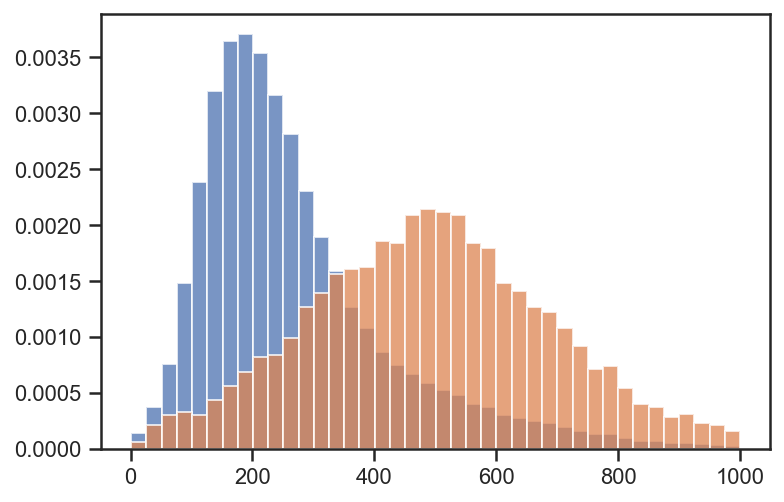

In [43]:
plt.hist(g_cnt_df['avg_words'], bins = 40, range=(1,1000), density=True, align = 'mid', alpha = 0.75)
plt.hist(g_cnt_hiphop_df['avg_words'], bins = 40, range=(1,1000), density=True, align = 'mid', alpha = 0.75)
plt.show()

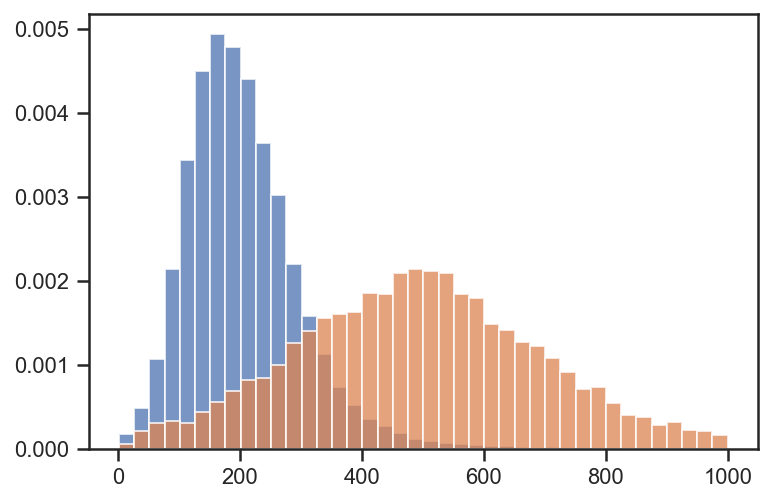

In [44]:
plt.hist(g_cnt_rock_df['avg_words'], bins = 40, range=(1,1000), density=True, align = 'mid', alpha = 0.75)
plt.hist(g_cnt_hiphop_df['avg_words'], bins = 40, range=(1,1000), density=True, align = 'mid', alpha = 0.75)
plt.show()

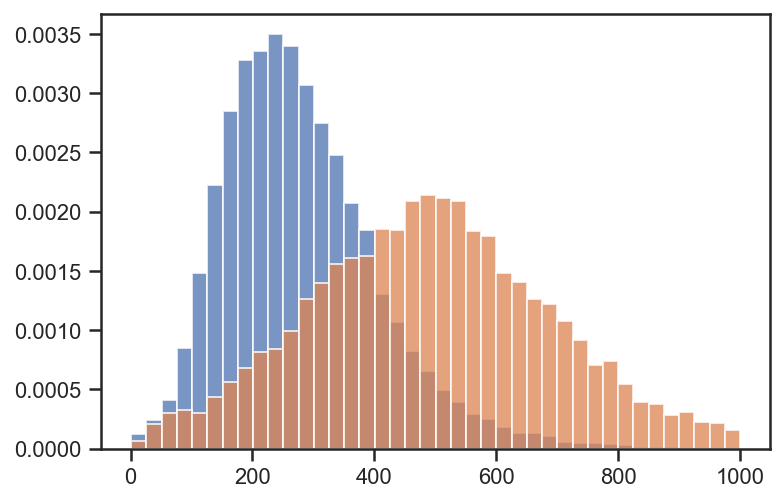

In [45]:
plt.hist(g_cnt_pop_df['avg_words'], bins = 40, range=(1,1000), density=True, align = 'mid', alpha = 0.75)
plt.hist(g_cnt_hiphop_df['avg_words'], bins = 40, range=(1,1000), density=True, align = 'mid', alpha = 0.75)
plt.show()

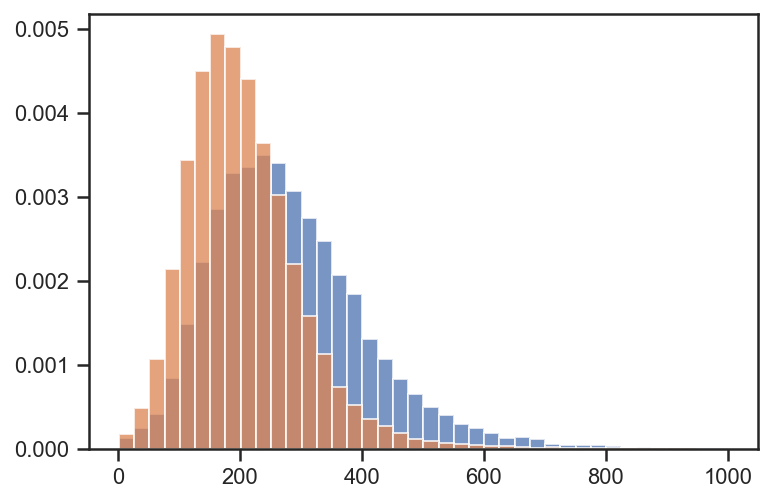

In [46]:
plt.hist(g_cnt_pop_df['avg_words'], bins = 40, range=(1,1000), density=True, align = 'mid', alpha = 0.75)
plt.hist(g_cnt_rock_df['avg_words'], bins = 40, range=(1,1000), density=True, align = 'mid', alpha = 0.75)
plt.show()

Taking a look at the decades data set. It does not look 'normal.'

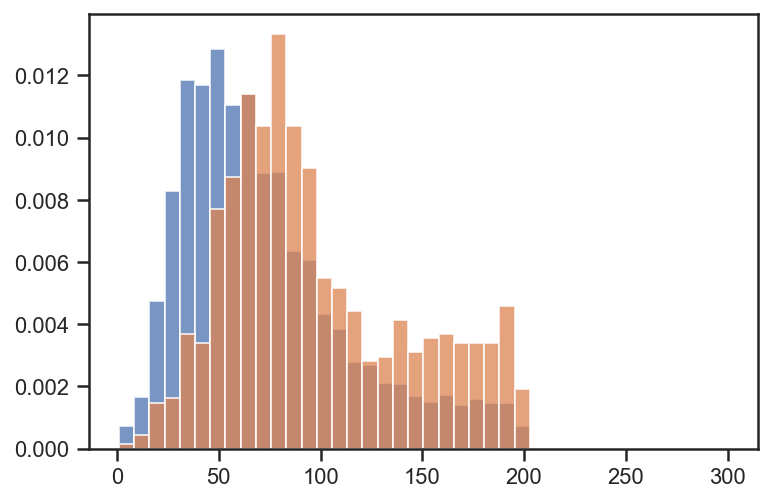

In [48]:
plt.hist(d_cnt_df['avg_words'], bins = 40, range=(1,300), density=True, align = 'mid', alpha = 0.75)
plt.hist(d_cnt_hiphop_df['avg_words'], bins = 40, range=(1,300), density=True, align = 'mid', alpha = 0.75)
plt.show()

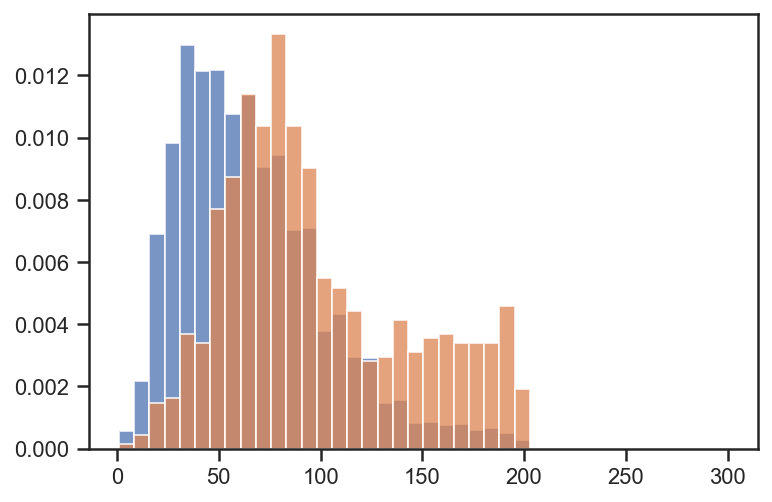

In [50]:
plt.hist(d_cnt_rock_df['avg_words'], bins = 40, range=(1,300), density=True, align = 'mid', alpha = 0.75)
plt.hist(d_cnt_hiphop_df['avg_words'], bins = 40, range=(1,300), density=True, align = 'mid', alpha = 0.75)
plt.show()

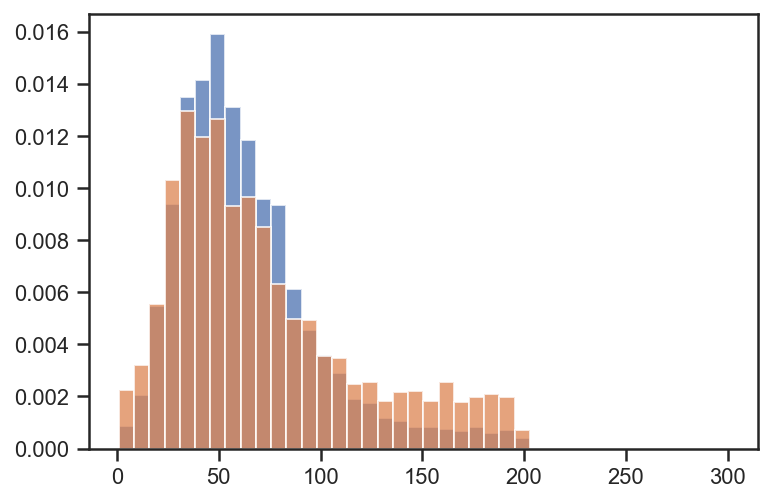

In [51]:
plt.hist(d_cnt_blues_df['avg_words'], bins = 40, range=(1,300), density=True, align = 'mid', alpha = 0.75)
plt.hist(d_cnt_jazz_df['avg_words'], bins = 40, range=(1,300), density=True, align = 'mid', alpha = 0.75)
plt.show()

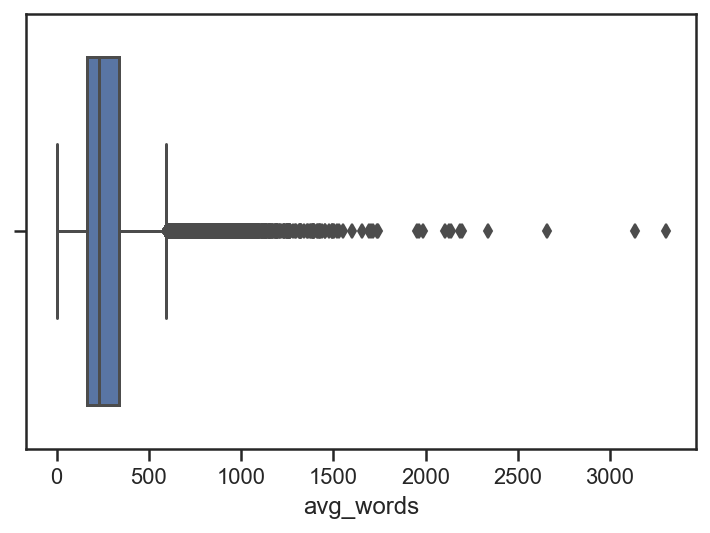

In [53]:
sns.boxplot(x=g_cnt_df['avg_words'], whis=1.5)
plt.show()

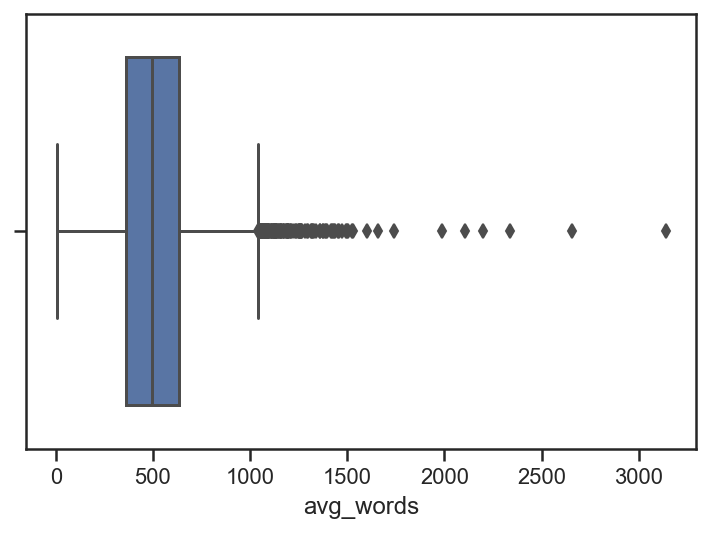

In [54]:
sns.boxplot(x=g_cnt_hiphop_df['avg_words'], whis=1.5)
plt.show()

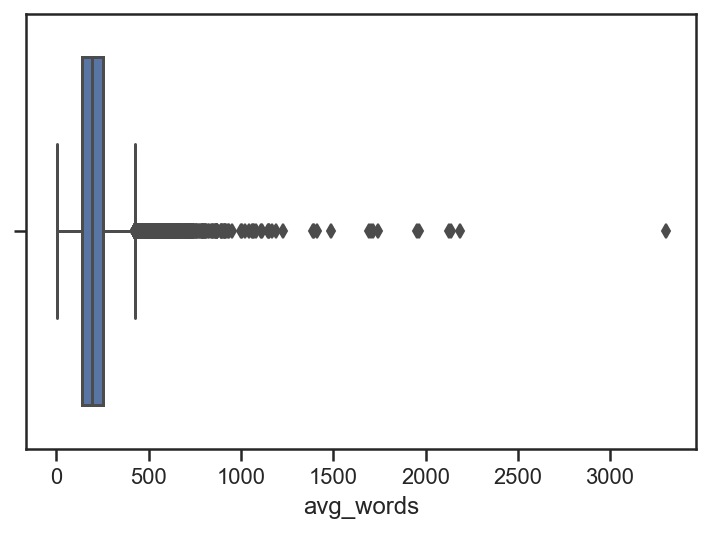

In [55]:
sns.boxplot(x=g_cnt_rock_df['avg_words'], whis=1.5)
plt.show()

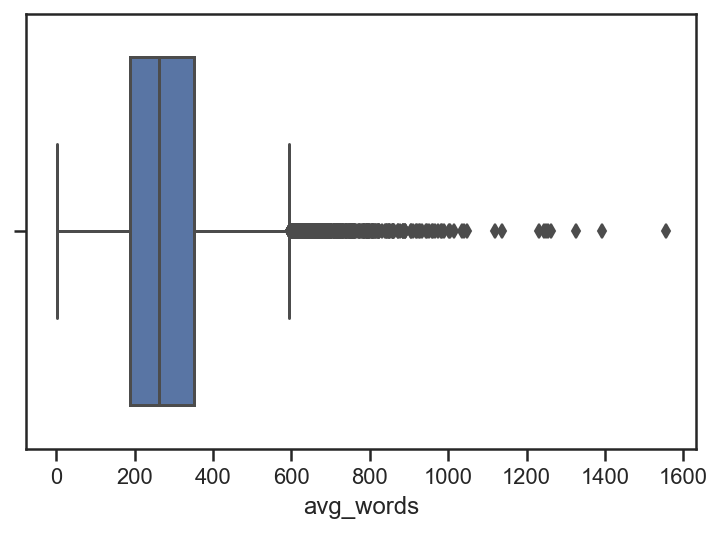

In [56]:
sns.boxplot(x=g_cnt_pop_df['avg_words'], whis=1.5)
plt.show()

In [57]:
from scipy.stats import ttest_ind
import numpy as np
hip_hop = g_cnt_hiphop_df['avg_words']
rock = g_cnt_rock_df['avg_words']
hip_hop_mean = np.mean(hip_hop)
rock_mean = np.mean(rock)
print("hip hop mean:", hip_hop_mean)
print("Rock mean:", rock_mean)
hip_hop_std = np.std(hip_hop)
rock_std = np.std(rock)
print("hip hop std:", hip_hop_std)
print("Rock std:", rock_std)
ttest, pval = ttest_ind(hip_hop, rock)
print('p-val', pval)
if pval < .05:
    print("We reject the null hypothesis")
else:
    print("We accept the null hypothesis")
    
print("Wait! Who's we?")

hip hop mean: 502.7992924006781
Rock mean: 205.87312535594506
hip hop std: 214.5021350760374
Rock std: 99.72012807514507
p-val 0.0
We reject the null hypothesis
Wait! Who's we?
